# Accidental Drug Related Deaths

This is an analysis of Accidental Drug Related Deaths in the US between the years 2012-2018

__Data set from:__ https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

The analysis explores the following questions:

### *Primary Question:*
1. What is the most significant factor determining accidental drug-related death?

### *Secondary Questions:*
1. Which drug or combinations of drugs were most lethal?
2. How significant is ‘Age’ as an explanatory variable?
3. How significant is ‘Race’ as an explanatory variable?
4. Place of death (Residence vs. Other) significant?
5. Optional variable we could analyze: Description of Injury (Drug Use, Ingestion, Injection, etc)

In [1]:
#Imports - Numpy, Pandas, MatPlotLib, Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Show plots magic function
%matplotlib inline

## EDA

In [2]:
#Get the file and assign it to add_df (stands for Accidental Drug Deaths DataFrame)
#add_df = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
DrugData = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
Holiday_Data=pd.read_csv('../data/raw/US Holidays 2012-2018.csv',sep=',')
locales=pd.read_csv('../data/raw/locales.csv')
connecticut=pd.read_csv('../data/raw/connecticut_pop.csv')

#Check the info and data
DrugData.info()
DrugData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,DateofDeath,35.0,Male,White,HEBRON,TOLLAND,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,DateofDeath,41.0,Male,White,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,DateofDeath,61.0,Male,Black,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,DateofDeath,51.0,Male,White,STRATFORD,FAIRFIELD,NaN,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,DateofDeath,45.0,Male,White,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [3]:
#Check missing data
DrugData.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [4]:
#Dropping rows with irreplaceable null values
DrugData.dropna(subset=['Date', 'Age', 'Sex', 'Race'], inplace=True)
DrugData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5088 non-null object
Date                   5088 non-null object
DateType               5088 non-null object
Age                    5088 non-null float64
Sex                    5088 non-null object
Race                   5088 non-null object
ResidenceCity          4921 non-null object
ResidenceCounty        4299 non-null object
ResidenceState         3547 non-null object
DeathCity              5087 non-null object
DeathCounty            3997 non-null object
Location               5068 non-null object
LocationifOther        588 non-null object
DescriptionofInjury    4311 non-null object
InjuryPlace            5023 non-null object
InjuryCity             3336 non-null object
InjuryCounty           2355 non-null object
InjuryState            1419 non-null object
COD                    5088 non-null object
OtherSignifican        168 non-null object
Heroin        

In [5]:
#Deal with date, adding column year, month, day_of_week, Holiday
date_new = pd.to_datetime(DrugData['Date'])
DrugData.insert(loc=2, column='new_date', value=date_new)
DrugData.insert(loc=3,column='Year',value=DrugData['new_date'].dt.year)

DrugData.insert(loc=4,column='Month',value=DrugData['new_date'].dt.month)
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
DrugData['Month'] = DrugData['Month'].apply(lambda x: months[x])

DrugData.insert(loc=5,column='day_of_week',value=DrugData['new_date'].dt.dayofweek)
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
DrugData['day_of_week'] = DrugData['day_of_week'].apply(lambda x: days[x])


In [6]:
#merge holiday dates with DrugDates
Holiday_Data['Date']=pd.to_datetime(Holiday_Data['Date'])
Holiday_Data.rename(columns={'Date':'new_date'},inplace=True)
Drug_Data = pd.merge(DrugData, Holiday_Data, on='new_date', how='left')
Holiday_col=Drug_Data.pop('Holiday')
Drug_Data.insert(loc=6,column='Holiday',value=Holiday_col)
Drug_Data.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [7]:
#Adding back missing value in Residence State: the result could adding back Residence state 1308 missing value
# extract ResidenceCity,ResidenceState create reference table Residency_Adj
Residency_Adj=Drug_Data.loc[:, ['ResidenceCity','ResidenceState']]
Residency_Adj= Residency_Adj.groupby(['ResidenceCity', 'ResidenceState']).size().reset_index(name='Freq')
#Residency_Adj.info()
#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj['is_duplicated'].sum()
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Drop the rows in Residency_Adj , only keep the right State for the duplicate cities.
#from wiki, Brooklyn belongs to state NY, Hampton to state NH, PLYMOUTH belongs to MA, REDDING states should be CA 
#and WARREN state is RI
Residency_Adj=Residency_Adj.drop([30,96,206,217,277,278],axis=0)
Residency_Adj.at[218,'ResidenceState']='CA'

#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Residency_Adj.info()

#use the reference table Residency_Adj to generate new column Residence_State_updated in Drug_Data with less missing value
Residency_Adj.rename(columns={'ResidenceState':'ResidenceState_update'},inplace=True)
add_df = pd.merge(Drug_Data, Residency_Adj, on='ResidenceCity', how='left')
Rstate_col=add_df.pop('ResidenceState_update')
add_df.insert(loc=12,column='ResidenceState_update',value=Rstate_col)
add_df=add_df.drop(['Freq','is_duplicated'],axis=1)
add_df.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [8]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 47 columns):
ID                       5088 non-null object
Date                     5088 non-null object
new_date                 5088 non-null datetime64[ns]
Year                     5088 non-null int64
Month                    5088 non-null object
day_of_week              5088 non-null object
Holiday                  155 non-null object
DateType                 5088 non-null object
Age                      5088 non-null float64
Sex                      5088 non-null object
Race                     5088 non-null object
ResidenceCity            4921 non-null object
ResidenceState_update    4853 non-null object
ResidenceCounty          4299 non-null object
ResidenceState           3547 non-null object
DeathCity                5087 non-null object
DeathCounty              3997 non-null object
Location                 5068 non-null object
LocationifOther          588 non-null object
Descriptionof

In [9]:
#Splitting DeathCityGeo and ResidenceCityGeo into Coordinates(long/lat) and Cities
add_df[['DeathCityCounty', 'DeathCoordinates']] = add_df['DeathCityGeo'].str.split('\n', expand = True)
add_df[['DeathCityExtracted', 'DeathCountyExtracted']] = add_df['DeathCityCounty'].str.split(',', expand = True)
add_df[['ResidenceCityExtracted', 'ResidenceCoordinates']] =add_df['ResidenceCityGeo'].str.split('\n', expand = True)

In [10]:
#Dropping all the columns we're not involved in the analysis
add_df.drop(['ID', 'DateType', 'MannerofDeath', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryPlace', 
               'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'InjuryCityGeo', 'COD', 'DeathCountyExtracted', 
               'DeathCityCounty', 'DeathCityGeo', 'ResidenceCityGeo'], axis=1, inplace = True)
add_df.head()

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,35.0,Male,White,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,41.0,Male,White,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",Bristol,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,61.0,Male,Black,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",Danbury,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,51.0,Male,White,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,45.0,Male,White,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"


In [11]:
#Make all string values uppercase
add_df = add_df.applymap(lambda x: x if type(x) != str  else x.upper())

#Checking to make sure NaN values haven't been affected.
add_df.LocationifOther[0]

nan

In [12]:
#Locating the NaN value in the DeathCity
DeathCityMissingloc = np.where(add_df['DeathCity'].isna())
DeathCityMissingloc

(array([137], dtype=int64),)

In [13]:
#Filling the NaN value of the DeathCity and overview of the cleaning process
add_df['DeathCity'].fillna(add_df['DeathCityExtracted'], inplace = True)
add_df.info()
add_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 36 columns):
Date                      5088 non-null object
new_date                  5088 non-null datetime64[ns]
Year                      5088 non-null int64
Month                     5088 non-null object
day_of_week               5088 non-null object
Holiday                   155 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
ResidenceState_update     4853 non-null object
DeathCity                 5088 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)"
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)"
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)"
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)"
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,NaN,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)"


In [14]:
add_df = pd.merge(add_df, connecticut, left_on='DeathCity', right_on='Town', how='left')
add_df = add_df.drop(['Town'], axis=1)

In [15]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 37 columns):
Date                      5088 non-null object
new_date                  5088 non-null datetime64[ns]
Year                      5088 non-null int64
Month                     5088 non-null object
day_of_week               5088 non-null object
Holiday                   155 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
ResidenceState_update     4853 non-null object
DeathCity                 5088 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

In [16]:
#Merge the results
add_df = pd.merge(add_df, locales, on='LocationifOther', how='left')

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna(add_df.Location)

#map the key phrases from the location column to more singular locations
place={'NAN':"OTHER",'COMMERCIAL':"COMMERCIAL",'CONVALESCENT HOME':'SUPERVISED CARE/HOSPITAL','HOSPICE':'SUPERVISED CARE/HOSPITAL','NURSING HOME':'SUPERVISED CARE/HOSPITAL','HOSPITAL':'SUPERVISED CARE/HOSPITAL','HOTEL':"HOTEL",'OTHER':"OTHER",'RESIDENCE':"RESIDENCE",'SUPERVISED':"SUPERVISED CARE/HOSPITAL",'VEHICLE':"VEHICLE"}
add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna('OTHER')

print(add_df.groupby(['cleaned_location'])['cleaned_location'].count())
print(add_df.groupby(['Location'])['Location'].count())


cleaned_location
COMMERCIAL                    17
HOTEL                        124
OTHER                        364
RESIDENCE                   2913
SUPERVISED CARE/HOSPITAL    1638
VEHICLE                       32
Name: cleaned_location, dtype: int64
Location
CONVALESCENT HOME       3
HOSPICE                 1
HOSPITAL             1620
NURSING HOME            1
OTHER                 770
RESIDENCE            2673
Name: Location, dtype: int64


## Which drug or combinations of drugs were most lethal?

Although the COD column explains the use of drugs, it is too verbose and is difficult to group similar values. We will create a new column 'drugs_involved' and poupulate it with the drugs marked 'Y' (suggesting involvement) separated by commas. We also have to arrange these in an alphabetical manner so it will make it easy to group them.

In [17]:
add_df

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates,Population,cleaned_location
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)",9686.0,RESIDENCE
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)",60477.0,SUPERVISED CARE/HOSPITAL
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)",80893.0,SUPERVISED CARE/HOSPITAL
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)",144229.0,RESIDENCE
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)",124775.0,RESIDENCE
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)",110366.0,RESIDENCE
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)",122643.0,SUPERVISED CARE/HOSPITAL
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)",7214.0,SUPERVISED CARE/HOSPITAL
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)",4629.0,RESIDENCE
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)",43069.0,SUPERVISED CARE/HOSPITAL


In [18]:
#Get Column names
add_df.columns

Index(['Date', 'new_date', 'Year', 'Month', 'day_of_week', 'Holiday', 'Age',
       'Sex', 'Race', 'ResidenceCity', 'ResidenceState_update', 'DeathCity',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'DeathCoordinates', 'DeathCityExtracted',
       'ResidenceCityExtracted', 'ResidenceCoordinates', 'Population',
       'cleaned_location'],
      dtype='object')

In [19]:
#Replace the indicator 'Y' with the name of the column in uppercase (in this case, the name of the drug).
#If null, don't change the value
def assignDrugName(value, column):
    if(value == 'Y'):
        return str(column).upper()
    else:
        return value

# Loop through the drugs columns. Don't change anything in the 'Other' column since it already has the name.
for column in add_df.loc[:, 'Heroin':'AnyOpioid']:
    if(column != 'Other'):
        add_df[column] = add_df[column].map(lambda value: assignDrugName(value, column))

add_df.loc[:, 'Heroin':'AnyOpioid'].head()

add_df.AnyOpioid = add_df.AnyOpioid.fillna('N')


In [20]:
#Create a new column and append the values in the drug columns to track multiple-use
add_df['drugs_used'] = add_df.loc[:, 'Heroin':'AnyOpioid'].apply(lambda value: ', '.join(value[value.notnull()]), axis = 1)
add_df['drugs_used'].value_counts()

HEROIN, N                                                                            340
COCAINE, N                                                                           217
HEROIN, ANYOPIOID                                                                    209
FENTANYL, ANYOPIOID                                                                  200
HEROIN, FENTANYL, ANYOPIOID                                                          162
HEROIN, COCAINE, N                                                                   144
FENTANYL, N                                                                          106
HEROIN, FENTANYL, N                                                                  101
COCAINE, FENTANYL, ANYOPIOID                                                          99
HEROIN, ETHANOL, N                                                                    96
HEROIN, COCAINE, ANYOPIOID                                                            86
HEROIN, COCAINE, FENT

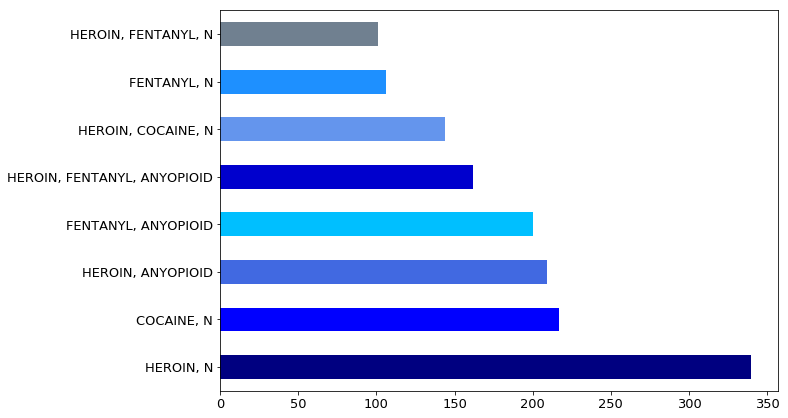

In [21]:
drugs_used_counts = add_df['drugs_used'].value_counts()
drugs_used_counts = drugs_used_counts.loc[drugs_used_counts > 100]
drugs_used_counts.plot(kind='barh', figsize=(10,7), color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'], fontsize=13);
plt.show()

In [22]:
drugs_used_counts.loc[drugs_used_counts > 100]


HEROIN, N                      340
COCAINE, N                     217
HEROIN, ANYOPIOID              209
FENTANYL, ANYOPIOID            200
HEROIN, FENTANYL, ANYOPIOID    162
HEROIN, COCAINE, N             144
FENTANYL, N                    106
HEROIN, FENTANYL, N            101
Name: drugs_used, dtype: int64

# Age as an explanatory variable?

We will group 'Age' into bins of range 10 to create a population pyramid to get a better understanding of the demographic.

In [27]:
# Verifying Minimum and Maximum values to determine the range of Age data
print('Minimum value for age is:', add_df['Age'].min())
print('Maximum value for age is:', add_df['Age'].max())

Minimum value for age is: 14.0
Maximum value for age is: 87.0


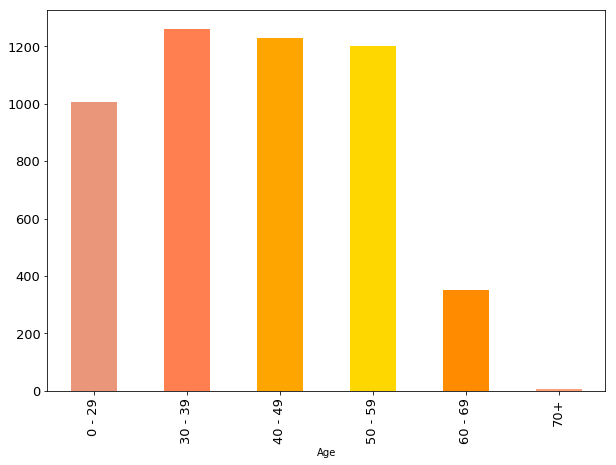

Age
70+           7
60 - 69     351
0 - 29     1006
50 - 59    1202
40 - 49    1229
30 - 39    1262
Name: Age, dtype: int64

In [52]:
#Age graph grouped into a population pyramid for an overview
bins = pd.cut(add_df['Age'], [0, 29, 39, 49, 59, 69, 70], right = True, 
              labels= ['0 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70+'])
add_df_Age = add_df.groupby(bins)['Age'].agg('count')
add_df_Age.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['darksalmon', 'coral', 'orange', 'gold', 'darkorange', 'lightsalmon']);
plt.show()
add_df_Age.sort_values(ascending = True)

In [35]:
# Count differences in Sex

add_df.groupby('Sex')['Age'].count()

Sex
FEMALE     1320
MALE       3767
UNKNOWN       1
Name: Age, dtype: int64

In [36]:
# Count differences in Sex by percentage

def percentage (part, whole):
    return 100 * float(part)/float(whole)

percentfemale = percentage (1320, 5087)
percentmale = percentage (3767, 5087)

print('% of Male:', percentmale, '% of Female:', percentfemale)

% of Male: 74.05150383330057 % of Female: 25.94849616669943


In [37]:
# Locating subject with Sex not defined

SexUnknownloc = np.where(add_df['Sex'] == 'UNKNOWN')
SexUnknownloc

(array([4122], dtype=int64),)

In [38]:
# Dropping subject with Sex not defined

add_df.drop(add_df.index[4122], inplace=True)

In [39]:
# Pivot Table, grouped by Sex and Age 

bins = pd.cut(add_df['Age'], [0, 29, 39, 49, 59, 69, 70], right = True, 
              labels= ['0 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70+'])
sex_age = add_df.pivot_table('Age', index = bins, columns = 'Sex', aggfunc='count')
sex_age

Sex,FEMALE,MALE
Age,,
0 - 29,269,737
30 - 39,273,989
40 - 49,334,895
50 - 59,347,855
60 - 69,84,267
70+,2,5


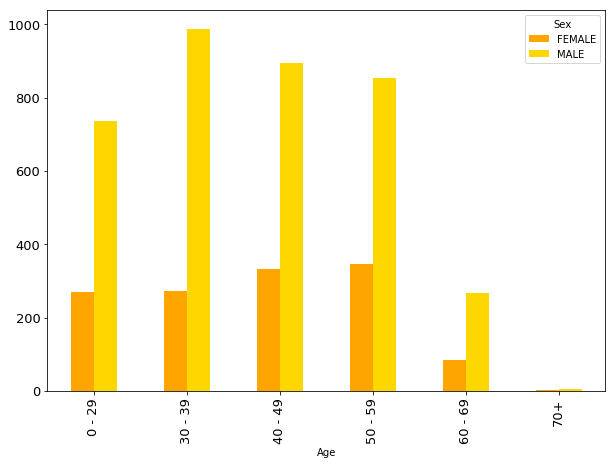

In [40]:
sex_age.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['orange', 'gold'])

# Location as an explanatory variable?

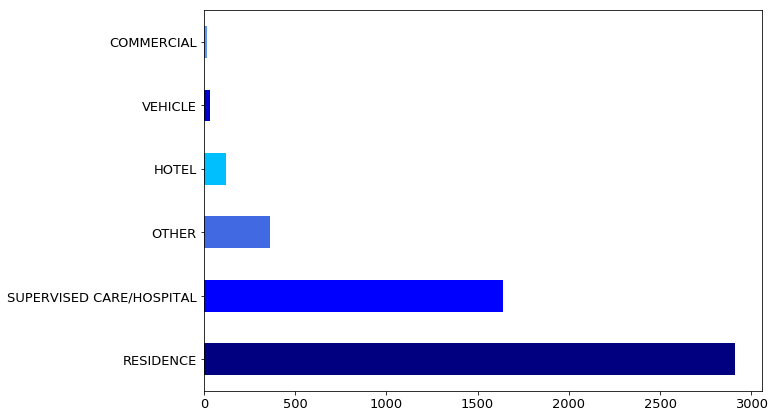

In [41]:
#Count of the locations that individuals died at
location_counts = add_df['cleaned_location'].value_counts()
location_counts.plot(kind='barh', figsize=(10,7), color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'], fontsize=13);
plt.show()

In [42]:
print(add_df.groupby(['cleaned_location','Sex'])['Age'].mean())

cleaned_location          Sex   
COMMERCIAL                FEMALE    28.000000
                          MALE      39.812500
HOTEL                     FEMALE    41.000000
                          MALE      42.872549
OTHER                     FEMALE    40.467532
                          MALE      39.895470
RESIDENCE                 FEMALE    43.850727
                          MALE      42.322970
SUPERVISED CARE/HOSPITAL  FEMALE    40.753813
                          MALE      41.101781
VEHICLE                   FEMALE    43.750000
                          MALE      41.321429
Name: Age, dtype: float64


In [43]:
#examination of age vs location
location_age = add_df.pivot_table('Age', index = bins, columns = 'cleaned_location', aggfunc='count',dropna=True,fill_value=0)
#location_age
print(location_age)

location_age_pct = pd.crosstab(bins,add_df['cleaned_location']).apply(lambda r: r/r.sum(), axis=1)

cleaned_location  COMMERCIAL  HOTEL  OTHER  RESIDENCE  \
Age                                                     
0 - 29                     6     23     82        522   
30 - 39                    4     28    110        709   
40 - 49                    1     35     83        690   
50 - 59                    6     29     71        734   
60 - 69                    0      9     13        235   
70+                        0      0      0          4   

cleaned_location  SUPERVISED CARE/HOSPITAL  VEHICLE  
Age                                                  
0 - 29                                 369        4  
30 - 39                                400       11  
40 - 49                                412        8  
50 - 59                                355        7  
60 - 69                                 92        2  
70+                                      3        0  


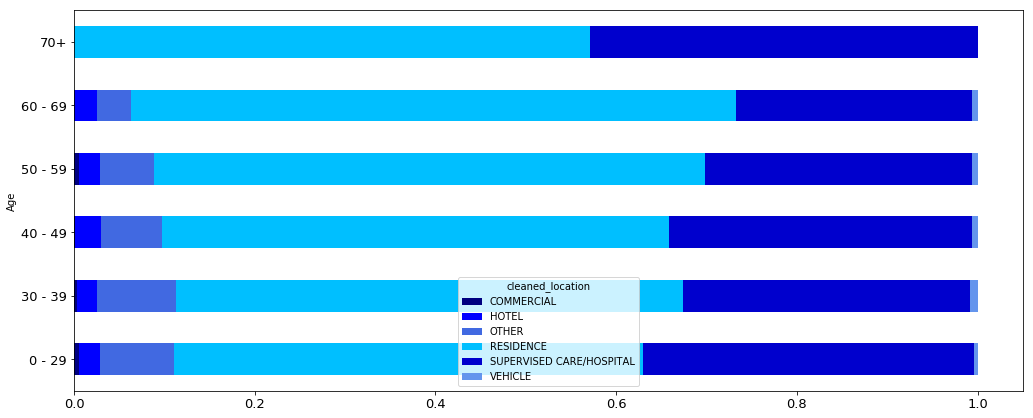

In [44]:
location_age_pct.plot(kind='barh', stacked=True, figsize = (17,7), fontsize=13, color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'])

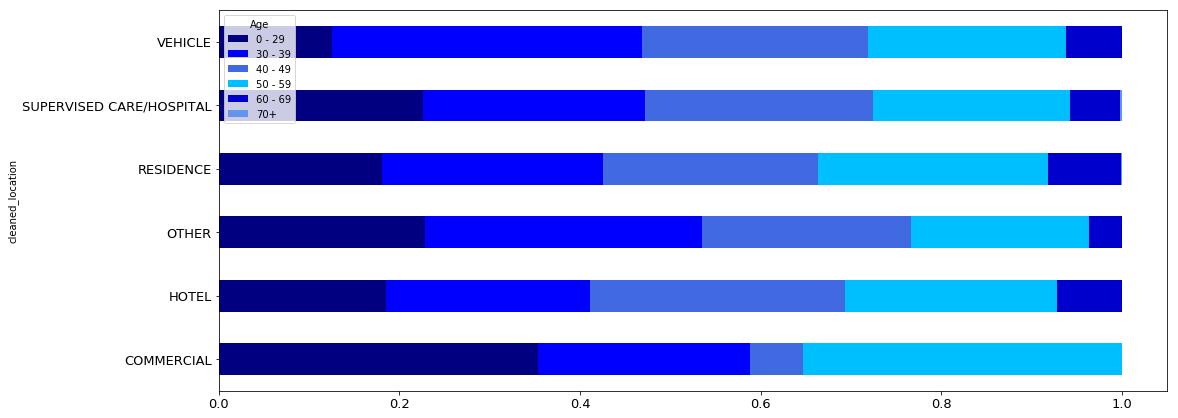

In [45]:
age_location_pct = pd.crosstab(add_df['cleaned_location'],bins).apply(lambda r: r/r.sum(), axis=1)
age_location_pct.plot(kind='barh', stacked=True, figsize = (17,7), fontsize=13, color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'])

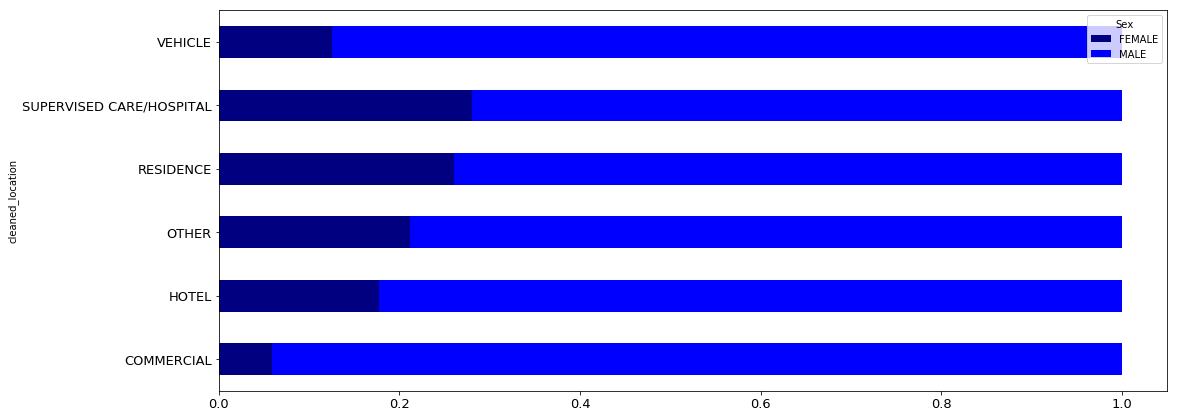

In [46]:
sex_location_pct = pd.crosstab(add_df['cleaned_location'],add_df.Sex).apply(lambda r: r/r.sum(), axis=1)
sex_location_pct.plot(kind='barh', stacked=True, figsize = (17,7), fontsize=13, color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'])

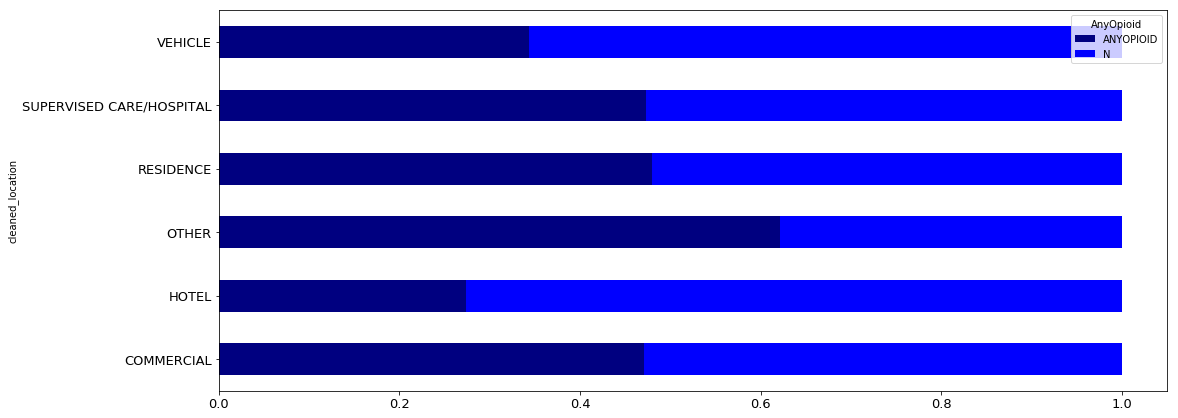

In [47]:
opioid_location_pct = pd.crosstab(add_df['cleaned_location'],add_df.AnyOpioid).apply(lambda r: r/r.sum(), axis=1)
opioid_location_pct.plot(kind='barh', stacked=True, figsize = (17,7), fontsize=13, color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'])

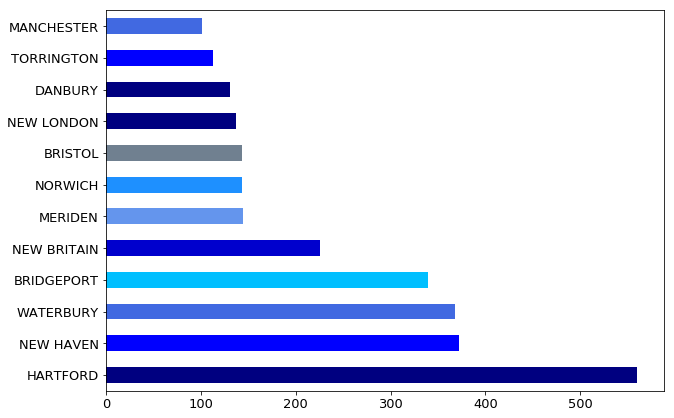

In [48]:
#Count of the locations that individuals died at
city_counts = add_df['DeathCityExtracted'].value_counts()
city_counts = city_counts.loc[city_counts > 100]

city_counts.plot(kind='barh', figsize=(10,7), color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'], fontsize=13);
plt.show()

In [49]:
#deaths by city per capita
top_cities = add_df.groupby(['DeathCity'])['DeathCity'].count().sort_values(ascending=False)[:10]
print(top_cities)

df_top_cities = pd.DataFrame({'DeathCity':top_cities.index, 'Deaths':top_cities.values})

df_top_cities = pd.merge(df_top_cities,connecticut,left_on='DeathCity', right_on='Town', how='left')

df_top_cities.drop(['Town'],axis=1)

df_top_cities['PerCapita']=(df_top_cities['Deaths']/df_top_cities['Population'])*100

DeathCity
HARTFORD       560
NEW HAVEN      372
WATERBURY      368
BRIDGEPORT     340
NEW BRITAIN    226
MERIDEN        145
BRISTOL        144
NORWICH        144
NEW LONDON     137
DANBURY        131
Name: DeathCity, dtype: int64


In [50]:
df_top_cities

,DeathCity,Deaths,Town,Population,PerCapita
0,HARTFORD,560,HARTFORD,124775,0.448808
1,NEW HAVEN,372,NEW HAVEN,129779,0.286641
2,WATERBURY,368,WATERBURY,110366,0.333436
3,BRIDGEPORT,340,BRIDGEPORT,144229,0.235736
4,NEW BRITAIN,226,NEW BRITAIN,73206,0.308718
5,MERIDEN,145,MERIDEN,60868,0.238220
6,BRISTOL,144,BRISTOL,60477,0.238107
7,NORWICH,144,NORWICH,40493,0.355617
8,NEW LONDON,137,NEW LONDON,27620,0.496017
9,DANBURY,131,DANBURY,80893,0.161942
